# PPP: Global Maps


In [1]:
# Importing packages
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import nc_time_axis
from dask.diagnostics import ProgressBar
import re
from xmovie import Movie

In [18]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

In [2]:
npp_ppp = xr.open_dataset('/home/saumyam/nppppp.nc')
tos_ppp = xr.open_dataset('/home/saumyam/tosppp.nc')
sos_ppp = xr.open_dataset('/home/saumyam/sosppp.nc')

In [7]:
THRESHOLD = 0.235559205


In [40]:
tos_predictable = (tos_ppp.where(tos_ppp['tos']<THRESHOLD,drop=True)) #.isel(time=0).time

In [19]:
tos_ppp_mean = tos_ppp['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    tos_ppp_mean = tos_ppp_mean.compute()

In [41]:
tos_predictable

<xarray.Dataset>
Dimensions:  (time: 120, yh: 575, xh: 720, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.72 -77.54 -77.36 -77.17 ... 89.47 89.68 89.89
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * nv       (nv) float64 1.0 2.0
  * xq       (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq       (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.37 89.58 89.79 90.0
  * zl       (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos      (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan nan

In [87]:
tos_ppp['tos']

<xarray.DataArray 'tos' (time: 120, yh: 576, xh: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119

In [80]:
month = np.argwhere(tos_ppp['tos'].to_numpy() < THRESHOLD)


In [84]:
month.sort(kind='stable')

In [85]:
month

array([[  0,  48, 477],
       [  0, 462, 674],
       [  0, 463, 674],
       ...,
       [119, 575, 696],
       [119, 575, 697],
       [119, 575, 698]])

In [86]:
month1 = month.sort(kind='stable')

In [47]:
h=xr.DataArray(np.random.randn(3,4))
h.assign_coords({'dim_0': [100,200,300], 'dim_1': [-400,-300,-200,-100]})

<xarray.DataArray (dim_0: 3, dim_1: 4)>
array([[-0.28663693, -1.10998004, -0.49614225,  0.90411467],
       [-1.98033421,  1.45857667,  0.02721792, -0.56976043],
       [-0.18984583, -1.458919  , -0.67731827, -1.17518329]])
Coordinates:
  * dim_0    (dim_0) int64 100 200 300
  * dim_1    (dim_1) int64 -400 -300 -200 -100

In [64]:
harr = h.to_numpy()

In [65]:
harr

array([[-0.28663693, -1.10998004, -0.49614225,  0.90411467],
       [-1.98033421,  1.45857667,  0.02721792, -0.56976043],
       [-0.18984583, -1.458919  , -0.67731827, -1.17518329]])

In [67]:
h_where = np.argwhere(harr > 0)

In [68]:
h_where

array([[0, 3],
       [1, 1],
       [1, 2]])

In [74]:
h_where[h_where[:,1].argmax()]

array([0, 3])

In [6]:
# minor helper method - returns the ppname for a particular driver
def pp(driver):
    if driver=='tos' or driver=='sos' or driver=='MLD_003':
        return 'ocean_month'
    elif re.search('intpp*',driver):
        return 'ocean_cobalt_omip_2d'
    elif driver=='chlos':
        return 'ocean_cobalt_omip_sfc'

In [ ]:
# can try using positional args: https://xarray.pydata.org/en/stable/generated/xarray.where.html

In [89]:
ds_tss = xr.open_dataset('/home/saumyam/data_netcdf_files/Control_Full/tos') # full control run for tos

In [90]:
ds_tss = ds_tss.chunk({'time':60})

In [92]:
ds_tss['time_bnds']

<xarray.DataArray 'time_bnds' (time: 3600, nv: 2)>
dask.array<xarray-time_bnds, shape=(3600, 2), dtype=object, chunksize=(60, 2), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 ... 0400-12-16 12:00:00
  * nv       (nv) float64 1.0 2.0
Attributes:
    long_name:  time axis boundaries

In [31]:
ds_tss #should be 3600 x full grid dimension

<xarray.Dataset>
Dimensions:    (xh: 720, yh: 576, time: 3600, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time       (time) object 0101-01-16 12:00:00 ... 0400-12-16 12:00:00
  * nv         (nv) float64 1.0 2.0
  * xq         (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq         (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * zl         (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos        (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>
Attributes:
    filename:          01010101.ocean_month.nc
    title:             ESM4_piControl_D
    associated_files:  areacello: 01010101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           2022-03-14 17:08:51 -0400: PostProcessing::PPNetCDF::t...

In [8]:
# returns the variance for a particular ensemble start year
def ens_var(start_year, driver_global, driver):
    # create a list of xarrays of control + ensemble data to be concatenated
    members = [*range(10)]
    ppname = pp(driver)
    
    # handle the control separately
    end = '0' + str(int(start_year) + 9)
    ctrl_slice = driver_global.sel(time=slice(start_year+'-01-16',end+'-12-16'))
    members[0] = ctrl_slice
    
    # loop through all 9 ensemble members
    for member in range(1,10):
        folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-0' + str(member)
        path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/'
                +folder+'/gfdl.ncrc4-intel18-prod-openmp/pp/'+ppname+'/ts/monthly/5yr/'+ppname+'.*'+driver+'.nc')
        ens_mem = xr.open_mfdataset(path)
        members[member] = ens_mem
        
    # combine all ensemble members and control into one xarray
    all_members = xr.concat(members,dim='members')
    
    # compute the variance
    variance = (all_members.std(dim='members')) ** 2
    
    return variance
    


In [9]:
STARTS = ['0123','0161','0185','0208','0230','0269','0300','0326','0359','0381']
def avg_ens_var(driver_global, driver):
    # initialize total to be stddev of first ensemble - year '0123'
    
    ensembles = [*range(10)]
    first = ens_var(STARTS[0],driver_global,driver)
    timei = first.time
    ensembles[0] = first
    
    for ens in range(1,10):
        time_adjusted = ens_var(STARTS[ens],driver_global,driver).assign_coords(time=timei)
        ensembles[ens] = time_adjusted
    
    total = xr.concat(ensembles,dim='ensemble')
    avg = total.mean(dim='ensemble')
    
    return avg


In [38]:
tos_ens_var208 = ens_var('0208',ds_tss,'tos')

In [14]:
tos_ens_var208

<xarray.Dataset>
Dimensions:  (xh: 720, yh: 576, time: 120, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 0208-01-16 12:00:00 ... 0217-12-16 12:00:00
  * nv       (nv) float64 1.0 2.0
  * xq       (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq       (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.37 89.58 89.79 90.0
  * zl       (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos      (time, yh, xh) float32 dask.array<chunksize=(36, 576, 720), meta=np.ndarray>

In [39]:
avg = avg_ens_var(ds_tss,'tos')

In [40]:
with ProgressBar():
    avg = avg.compute()

[###                                     ] | 8% Completed |  2.9s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 58.9s


In [42]:
avg

<xarray.Dataset>
Dimensions:  (xh: 720, yh: 576, time: 120, nv: 2, xq: 720, yq: 576, zl: 75)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 0123-01-16 12:00:00 ... 0132-12-16 12:00:00
  * nv       (nv) float64 1.0 2.0
  * xq       (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0
  * yq       (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.37 89.58 89.79 90.0
  * zl       (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    tos      (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan nan

In [43]:
timeindex = np.arange(120)

In [73]:
avg = avg.assign_coords(time=timeindex)

### Computing the variance of the control run by month

And packaging it into an xarray that can be cleanly divided with the average ensemble variance computed above.

In [32]:
tos_month = ds_tss['tos'].groupby('time.month')

In [33]:
tos_month

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [34]:
tos_ctrl_var = tos_month.std() ** 2

In [47]:
tos_ctrl_var

<xarray.DataArray 'tos' (month: 12, yh: 576, xh: 720)>
dask.array<pow, shape=(12, 576, 720), dtype=float32, chunksize=(1, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [48]:
# extracting the numpy array
tos_ctrl_var_arr = tos_ctrl_var.to_numpy()


In [ ]:
# repeating the numpy array to get 120 months/10 years - so that dimensions align with the average ensemble
# variance numpy array

In [60]:
repeated = np.tile(tos_ctrl_var_arr, (10,1,1))

In [61]:
repeated.shape # dimensions align yay

(120, 576, 720)

In [63]:
# packaging the control variance data into an xarray with all the proper dimensions
dsnew = avg.copy(data={'tos':repeated})

In [74]:
# changing the time dimension to be an index
dsnew = dsnew.assign_coords(time=timeindex)

### Calculating PPP

In [76]:
ratio = avg / dsnew

In [89]:
ppp = 1 - ratio

In [99]:
ppp.to_netcdf('/home/saumyam/tosppp.nc')

## Plotting

In [5]:
ppp = xr.open_dataset('/home/saumyam/tosppp.nc')

In [6]:
southern = ppp.where(grid['basin']==1,drop=True)

In [7]:
atlantic = ppp.where(grid['basin']==2,drop=True)
atlantic_mean = atlantic['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    atlantic_mean = atlantic_mean.compute()

In [18]:
indian = ppp.where(grid['basin']==5,drop=True)
indian_mean = indian['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    indian_mean = indian_mean.compute()

In [8]:
pacific = ppp.where(grid['basin']==3,drop=True)
pacific_mean = pacific['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    pacific_mean = pacific_mean.compute()

In [9]:
arctic = ppp.where(grid['basin']==4,drop=True)
arctic_mean = arctic['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    arctic_mean = arctic_mean.compute()

In [10]:
southern_mean = (southern['tos'].weighted(grid['areacello']).mean(['xh','yh']))

In [11]:
with ProgressBar():
    southern_mean = southern_mean.compute()

In [12]:
ppp_mean = ppp['tos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    ppp_mean = ppp_mean.compute()

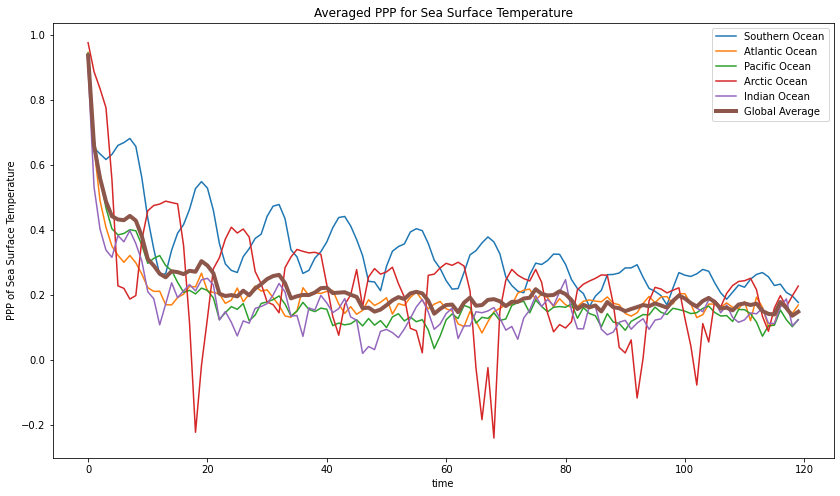

In [19]:
figure(figsize=(14,8))
southern_mean.plot(label='Southern Ocean')
atlantic_mean.plot(label='Atlantic Ocean')
pacific_mean.plot(label='Pacific Ocean')
arctic_mean.plot(label='Arctic Ocean')
indian_mean.plot(label='Indian Ocean')
ppp_mean.plot(linewidth=4,label='Global Average')
plt.ylabel('PPP of Sea Surface Temperature')
plt.title('Averaged PPP for Sea Surface Temperature')
plt.legend()

In [125]:
ppp_mean

<xarray.DataArray 'tos' (time: 120)>
array([0.9358704 , 0.6579256 , 0.55858815, 0.48668313, 0.44116327,
       0.43150145, 0.42913812, 0.4424394 , 0.42782953, 0.380328  ,
       0.30982554, 0.28949898, 0.26445735, 0.25353116, 0.27215278,
       0.269404  , 0.26337847, 0.27360457, 0.27051032, 0.30326474,
       0.28983232, 0.26576427, 0.20312227, 0.19588824, 0.19889444,
       0.19480851, 0.21227539, 0.1983832 , 0.219075  , 0.2323383 ,
       0.24815145, 0.25733364, 0.2610848 , 0.23551221, 0.18867163,
       0.19520676, 0.19929186, 0.1988863 , 0.2066239 , 0.22006203,
       0.22139536, 0.20501989, 0.20640117, 0.20763478, 0.19995758,
       0.19312733, 0.15842986, 0.16016868, 0.14797606, 0.15422015,
       0.16767427, 0.18276152, 0.1925205 , 0.18672568, 0.20409127,
       0.20887043, 0.20405981, 0.18158618, 0.14141992, 0.15639085,
       0.16818719, 0.16963358, 0.14614525, 0.17566772, 0.19108279,
       0.16611633, 0.16808063, 0.18407565, 0.18629919, 0.17975615,
       0.1649514 , 0.17812733, 0.17819613, 0.18824068, 0.19066617,
       0.21697597, 0.20271619, 0.1976344 , 0.19925071, 0.21059093,
       0.20183438, 0.18364525, 0.15594701, 0.16876519, 0.16105014,
       0.16688816, 0.14851175, 0.17755161, 0.16160281, 0.1582729 ,
       0.14944841, 0.15598251, 0.16184594, 0.1682651 , 0.16450216,
       0.17319049, 0.16699   , 0.16006874, 0.18116993, 0.19719316,
       0.18845958, 0.17415749, 0.16369359, 0.18074413, 0.1901249 ,
       0.17740384, 0.15746228, 0.16016777, 0.15175052, 0.1697403 ,
       0.17325915, 0.16829851, 0.17266513, 0.14998157, 0.14095671,
       0.13916595, 0.17773537, 0.15912515, 0.1353026 , 0.14760758],
      dtype=float32)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119

### Packaged into one function that just takes the driver name as input:

In [10]:
# returns xarray of ppp
def ppp(driver):
    ds = xr.open_dataset('/home/saumyam/data_netcdf_files/Control_Full/'+driver)
    ds = ds.chunk({'time':60})
    
    avg_ens = avg_ens_var(ds,driver)
    with ProgressBar():
        avg_ens = avg_ens.compute()
    timeindex = np.arange(120)
    avg_ens = avg_ens.assign_coords(time=timeindex)
    
    control_monthly = ds[driver].groupby('time.month')
    control_var_monthly = control_monthly.std() ** 2
    control_var_arr = control_var_monthly.to_numpy()
    repeated = np.tile(control_var_arr, (10,1,1))
    #xarray.repeat
    
    ctrl_var = avg_ens.copy(data={driver:repeated})
    ctrl_var = ctrl_var.assign_coords(time=timeindex)
    
    ratio = avg_ens / ctrl_var
    ppp = 1 - ratio
    return ppp

In [140]:
sosppp = ppp('sos')

[##                                      ] | 6% Completed |  4.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  1min  9.5s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [143]:
sosppp.to_netcdf('/home/saumyam/sosppp')

In [14]:
sosppp = xr.open_dataset('/home/saumyam/sosppp')

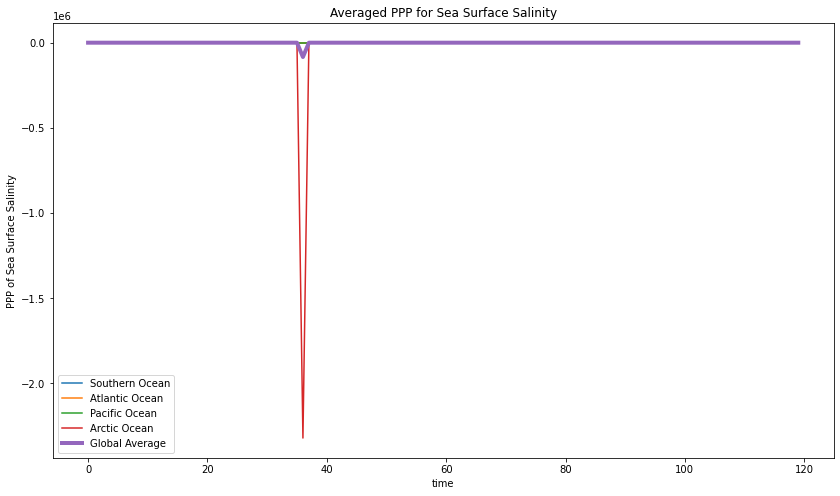

In [15]:
sos_southern = sosppp.where(grid['basin']==1,drop=True)
sos_southern_mean = (sos_southern['sos'].weighted(grid['areacello']).mean(['xh','yh']))
with ProgressBar():
    sos_southern_mean = sos_southern_mean.compute()

sos_atlantic = sosppp.where(grid['basin']==2,drop=True)
sos_atlantic_mean = sos_atlantic['sos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    sos_atlantic_mean = sos_atlantic_mean.compute()

sos_pacific = sosppp.where(grid['basin']==3,drop=True)
sos_pacific_mean = sos_pacific['sos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    sos_pacific_mean = sos_pacific_mean.compute()

sos_arctic = sosppp.where(grid['basin']==4,drop=True)
sos_arctic_mean = sos_arctic['sos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    sos_arctic_mean = sos_arctic_mean.compute()



sos_ppp_mean = sosppp['sos'].weighted(grid['areacello']).mean(['xh','yh'])
with ProgressBar():
    sos_ppp_mean = sos_ppp_mean.compute()

figure(figsize=(14,8))
sos_southern_mean.plot(label='Southern Ocean')
sos_atlantic_mean.plot(label='Atlantic Ocean')
sos_pacific_mean.plot(label='Pacific Ocean')
sos_arctic_mean.plot(label='Arctic Ocean')
sos_ppp_mean.plot(linewidth=4,label='Global Average')
plt.ylabel('PPP of Sea Surface Salinity')
plt.title('Averaged PPP for Sea Surface Salinity')
plt.legend()

In [20]:
sos_ppp_mean

<xarray.DataArray 'sos' (time: 120)>
array([ 9.7820133e-01,  8.6999673e-01,  7.9773080e-01,  7.3807847e-01,
        6.9531381e-01, -4.3952918e-01,  6.4171660e-01,  6.2514806e-01,
        5.9666061e-01,  5.5684477e-01,  5.4255098e-01,  5.0159937e-01,
        4.6902809e-01,  4.4910190e-01,  4.4335398e-01,  4.3221700e-01,
        4.2620450e-01,  4.2080891e-01,  4.1973877e-01,  4.1729215e-01,
        3.8857615e-01,  3.6882386e-01,  3.6298898e-01,  3.3519390e-01,
        3.3362654e-01,  3.2852927e-01,  3.2591742e-01,  3.2143217e-01,
        3.2344043e-01,  3.1937635e-01,  3.2119823e-01,  3.2525092e-01,
        3.2664382e-01,  3.1762519e-01,  3.0053070e-01,  2.8679925e-01,
       -8.4008305e+04, -1.4176844e+01, -3.7944665e+00,  2.8071144e-01,
        2.9323930e-01,  2.9531771e-01,  2.9686776e-01,  3.0026460e-01,
        2.7374968e-01,  2.8484601e-01,  2.7034768e-01,  2.5664002e-01,
        2.5100750e-01,  2.4715567e-01,  2.4934383e-01,  2.5283113e-01,
        2.6207620e-01,  2.6181382e-01,  2.6232725e-01,  2.5734499e-01,
        2.5748959e-01,  2.4885425e-01,  2.3856468e-01,  2.2556968e-01,
        2.2186565e-01,  2.2230290e-01,  2.2101220e-01,  2.2577924e-01,
        2.3226824e-01,  2.3404785e-01,  2.3287924e-01, -8.1882029e+00,
        2.3862596e-01,  2.3511182e-01,  2.2060855e-01,  2.0492481e-01,
        2.0871051e-01,  2.0834970e-01,  2.1569140e-01,  2.1076344e-01,
        2.1693195e-01, -4.8474291e-01,  2.2277072e-01,  3.7050459e-03,
        2.3997498e-01,  2.3968454e-01,  2.2736123e-01,  2.1538848e-01,
        2.2144002e-01,  2.1767657e-01,  2.1799944e-01,  2.1773449e-01,
        2.3257501e-01,  2.3029628e-01,  2.2412021e-01,  2.2527762e-01,
        2.3067756e-01, -2.6017022e-01,  2.1292907e-01,  2.0319478e-01,
        2.0573762e-01,  2.1002361e-01,  2.1412054e-01,  2.1878220e-01,
        2.2527471e-01,  2.2202720e-01,  2.2357880e-01,  2.2464058e-01,
        2.2119048e-01,  2.2347833e-01,  2.1719822e-01,  2.0231201e-01,
        2.0666218e-01, -4.2313889e-02,  2.1031854e-01,  2.1346548e-01,
        2.1308886e-01,  2.1471909e-01,  2.1618950e-01,  2.1692277e-01,
        2.1744540e-01,  2.1693861e-01,  1.9880472e-01,  1.9539781e-01],
      dtype=float32)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119

In [25]:
npp_ppp = ppp('intpp')

[###                                     ] | 8% Completed |  5.4s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  1min  9.9s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [26]:
npp_ppp.to_netcdf('/home/saumyam/nppppp')

In [12]:
nppmov = Movie(npp_ppp['intpp'],vmin=0,vmax=1)

In [13]:
nppmov.save('nppppp.gif')

Movie created at nppppp.mp4
GIF created at nppppp.gif


In [15]:
sosmov = Movie(sosppp['sos'],vmin=0,vmax=1)
sosmov.save('sosppp.gif')

Movie created at sosppp.mp4
GIF created at sosppp.gif


In [16]:
tos_ppp = xr.open_dataset('/home/saumyam/tosppp.nc')
tosmov = Movie(tos_ppp['tos'],vmin=0,vmax=1)

In [17]:
tosmov.save('tosppp.gif')

Movie created at tosppp.mp4
GIF created at tosppp.gif
